<a href="https://colab.research.google.com/github/88FaHaD/Deep-learning/blob/main/Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Classification

A few types of classification problems

**1 Binaryclass Classification 2 Multiclass Classification**
**3 Multilabel Classification**

# Architecture of neural network classification
1. Output Structure:

* Binary Classification: Single output neuron (1 element).
* Multi-class Classification: One output neuron per class.

2. Activation Function:

* Binary Classification: Sigmoid activation function, which outputs a probability between 0 and 1.
* Multi-class Classification: Softmax activation function, which outputs probabilities that sum to 1 across all classes.
3. Loss Function:

* Binary Classification: Binary Crossentropy, which measures the difference between predicted and true probabilities for binary targets.
* Multi-class Classification: Categorical Crossentropy, which measures the difference between predicted and true probabilities for multiple classes.
4. Usage:

* Binary Classification: Used when there are 2 classes (e.g., Yes/No, True/False).
* Multi-class Classification: Used for 3 or more classes (e.g., Dog, Cat, Bird)


## Inputs for image data
The inpus for image classifiction is in the following format

shape=[batch size,width,height,colorchanel]

typical shape values =[32.224,224,3/2]


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Creating Data

In [2]:
from sklearn.datasets import make_circles
# make 1000 samples
n_samples=1000

# create circles
x,y = make_circles(n_samples,noise=0.03,random_state=42)

In [3]:
# features
x,len(x)

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 1000)

In [4]:
# labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

# Visualizing data

In [5]:
circles=pd.DataFrame({"x0":x[:,0],"x1":x[:,1],"label":y})
circles

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


# We are classifying red or blue dot

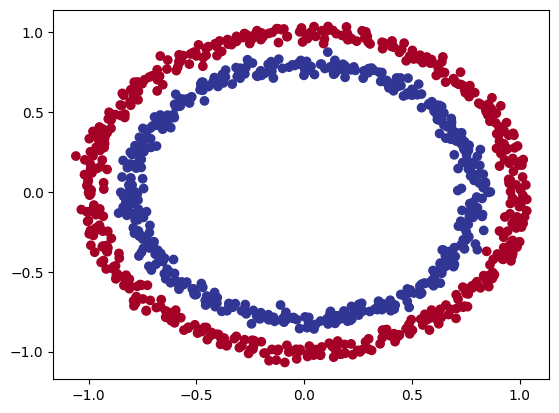

In [6]:
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu)


In [7]:
x.shape,y.shape

((1000, 2), (1000,))

In [8]:
# on x[0] output wll be y[0]
x[0],y[0]

(array([0.75424625, 0.23148074]), 1)

In [9]:
# create the model
model1=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(100,activation="sigmoid"),
    tf.keras.layers.Dense(1)
])
# compile the model
model1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
)

# fit the model
model1.fit(x,y,epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4909 - loss: 0.7648
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5271 - loss: 0.6977
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5002 - loss: 0.7065
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5169 - loss: 0.6974
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5126 - loss: 0.7001
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5193 - loss: 0.7111
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5127 - loss: 0.7091
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5093 - loss: 0.7514
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5251 - loss: 0.7174
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4823 - loss: 0.7118
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5107 - loss: 0.6980
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

# Improving the model

In [10]:
# Create the model
model2=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(100,activation="sigmoid"),
    tf.keras.layers.Dense(100,activation="sigmoid"),
    tf.keras.layers.Dense(1)
])

# Compile the model
model2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
)

# Fit the model
model2.fit(x,y,epochs=200)


Epoch 1/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4865 - loss: 8.2763
Epoch 2/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5238 - loss: 7.6753
Epoch 3/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4847 - loss: 8.3052
Epoch 4/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4914 - loss: 8.1983
Epoch 5/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5038 - loss: 7.9978
Epoch 6/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5126 - loss: 7.8559
Epoch 7/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5107 - loss: 7.8858
Epoch 8/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5247 - loss: 7.6612
Epoch 9/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4855 - loss: 8.2922
Epoch 10/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4886 - loss: 8.2434
Epoch 11/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5201 - loss: 7.7345
Epoch 12/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

In [11]:
model2.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4955 - loss: 8.1322   


[8.059046745300293, 0.5]

#Improving the model

In [12]:
model3=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(100,activation="sigmoid"),
    tf.keras.layers.Dense(100,activation="sigmoid"),
    tf.keras.layers.Dense(100,activation="sigmoid"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)

model3.fit(x,y,epochs=300)

Epoch 1/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5127 - loss: 0.8115
Epoch 2/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4861 - loss: 0.6974
Epoch 3/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4820 - loss: 0.7139
Epoch 4/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5006 - loss: 0.6994
Epoch 5/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4978 - loss: 0.6972
Epoch 6/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4621 - loss: 0.7052
Epoch 7/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4960 - loss: 0.6956 
Epoch 8/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4863 - loss: 0.7025
Epoch 9/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4898 - loss: 0.6951
Epoch 10/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5130 - loss: 0.6928
Epoch 11/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4589 - loss: 0.7023
Epoch 12/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accura

In [13]:
model3.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5987 - loss: 0.6370


[0.6345949172973633, 0.5849999785423279]

In [14]:
predictvalues=model3.predict(x)
predictvalues

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


array([[0.5254399 ],
       [0.623425  ],
       [0.6660567 ],
       [0.5254402 ],
       [0.5254399 ],
       [0.52544266],
       [0.5254399 ],
       [0.5254399 ],
       [0.5254401 ],
       [0.5254399 ],
       [0.60253143],
       [0.5254399 ],
       [0.5254399 ],
       [0.5254399 ],
       [0.5254399 ],
       [0.5254399 ],
       [0.00397743],
       [0.5254399 ],
       [0.67269313],
       [0.6369415 ],
       [0.5254399 ],
       [0.5254513 ],
       [0.5254399 ],
       [0.5254399 ],
       [0.66960514],
       [0.24846227],
       [0.5254399 ],
       [0.5254399 ],
       [0.5254399 ],
       [0.5254399 ],
       [0.525451  ],
       [0.5254399 ],
       [0.5254399 ],
       [0.5254399 ],
       [0.52544004],
       [0.5672393 ],
       [0.52547544],
       [0.5254399 ],
       [0.5254399 ],
       [0.5254399 ],
       [0.58441776],
       [0.5254399 ],
       [0.6709412 ],
       [0.5254399 ],
       [0.1717138 ],
       [0.00912564],
       [0.5254399 ],
       [0.525

# Visualizing the predictions

In [15]:
def plot_decision_boundary(model, x, y):
    # Create meshgrid for decision boundary
    x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
    y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Create x values on which to make predictions
    x_in = np.c_[xx.ravel(), yy.ravel()]

    # Make predictions
    y_pred = model.predict(x_in)

    # Reshape the predictions for binary classification (round to 0 or 1)
    y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


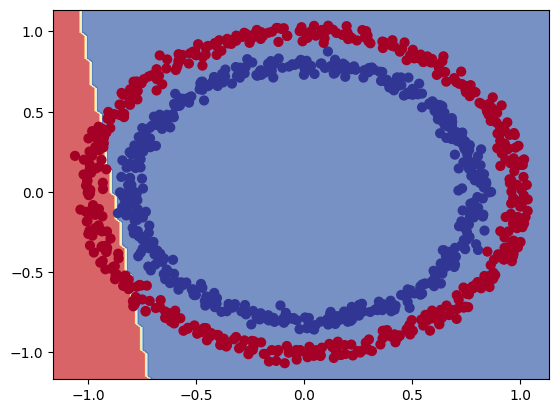

In [16]:
plot_decision_boundary(model=model3,
                      x=x,
                      y=y)

# Non Linearity

In [17]:
model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(100, activation="linear"),
    tf.keras.layers.Dense(100, activation="linear"),
    tf.keras.layers.Dense(100, activation="linear"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


model4.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)

history=model4.fit(x,y,epochs=300)

Epoch 1/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4798 - loss: 1.0108
Epoch 2/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4718 - loss: 0.7025
Epoch 3/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4984 - loss: 0.7017
Epoch 4/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5222 - loss: 0.6933
Epoch 5/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4781 - loss: 0.6936
Epoch 6/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5188 - loss: 0.6929
Epoch 7/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4660 - loss: 0.6937 
Epoch 8/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4814 - loss: 0.6935
Epoch 9/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4983 - loss: 0.6932
Epoch 10/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4474 - loss: 0.6935
Epoch 11/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4728 - loss: 0.6934
Epoch 12/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


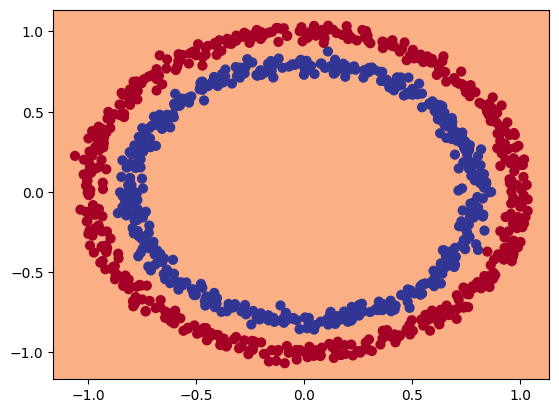

In [18]:
plot_decision_boundary(model=model4,
                        x=x,
                      y=y)

In [19]:
model5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


model5.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)

history=model5.fit(x,y,epochs=300)

Epoch 1/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4921 - loss: 0.6909
Epoch 2/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6092 - loss: 0.6570
Epoch 3/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5661 - loss: 0.6558 
Epoch 4/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5212 - loss: 0.6928
Epoch 5/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5098 - loss: 0.6932 
Epoch 6/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5328 - loss: 0.6930 
Epoch 7/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5010 - loss: 0.6935
Epoch 8/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5084 - loss: 0.6929
Epoch 9/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5452 - loss: 0.6900
Epoch 10/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5706 - loss: 0.6737
Epoch 11/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6082 - loss: 0.6577
Epoch 12/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accura

In [20]:
model5.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5978 - loss: 0.6250  


[0.6296674609184265, 0.5889999866485596]

In [21]:
model6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model6.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)

history=model6.fit(x,y,epochs=300)

Epoch 1/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5205 - loss: 0.6919
Epoch 2/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5180 - loss: 0.6868
Epoch 3/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4965 - loss: 0.6873
Epoch 4/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5318 - loss: 0.6822
Epoch 5/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5335 - loss: 0.6789
Epoch 6/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5556 - loss: 0.6743
Epoch 7/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5983 - loss: 0.6677
Epoch 8/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6305 - loss: 0.6683
Epoch 9/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5751 - loss: 0.6697
Epoch 10/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5488 - loss: 0.6668
Epoch 11/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6294 - loss: 0.6623
Epoch 12/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


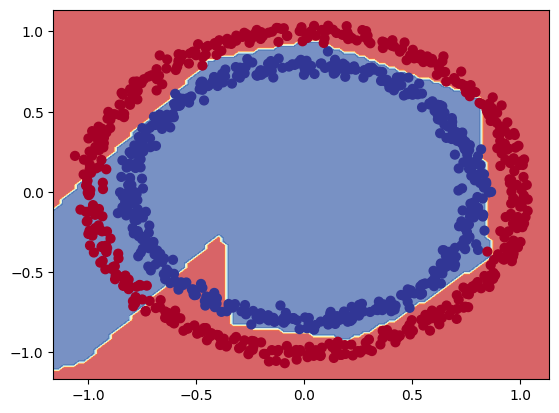

In [22]:
plot_decision_boundary(model6,x=x,y=y)

(<tf.Tensor: shape=(20,), dtype=float32, numpy=
 array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
          1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
       dtype=float32)>,
 [<matplotlib.lines.Line2D at 0x7d0f4b7a6c80>])

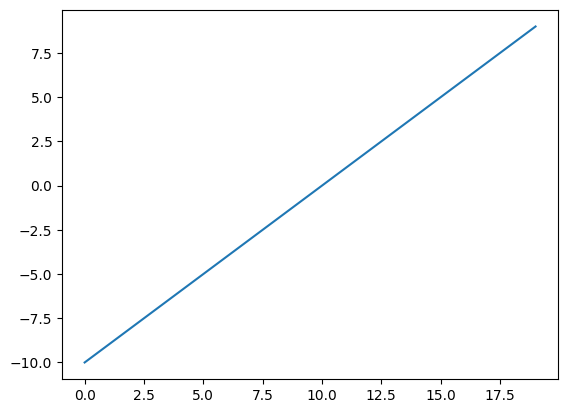

In [23]:
A=tf.cast(tf.range(-10,10),tf.float32)
A,plt.plot(A)

# Applying Activation functions

Neural networks learn from data from combination of inear and non linear functions

#1. Sigmoid

In [24]:
# sigmoid(X)=1/(1+exp(-x))
def sigmoid(x):
  return 1+(1+tf.exp(-x))

sigmoid(A)


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([2.2028465e+04, 8.1050835e+03, 2.9829580e+03, 1.0986332e+03,
       4.0542877e+02, 1.5041316e+02, 5.6598148e+01, 2.2085537e+01,
       9.3890562e+00, 4.7182817e+00, 3.0000000e+00, 2.3678794e+00,
       2.1353354e+00, 2.0497870e+00, 2.0183158e+00, 2.0067379e+00,
       2.0024786e+00, 2.0009117e+00, 2.0003355e+00, 2.0001235e+00],
      dtype=float32)>

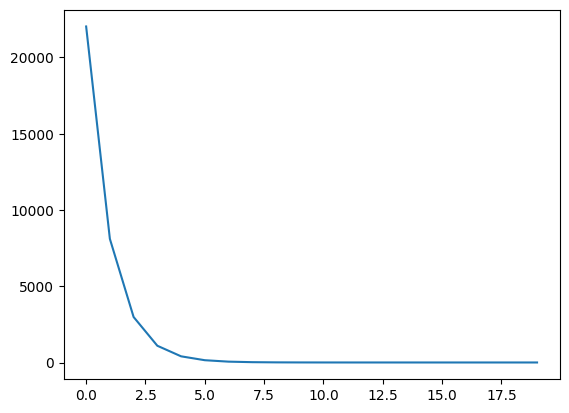

In [25]:
plt.plot(sigmoid(A))

# 2. relu

In [26]:
def relu(x):
  return tf.maximum(0,x)



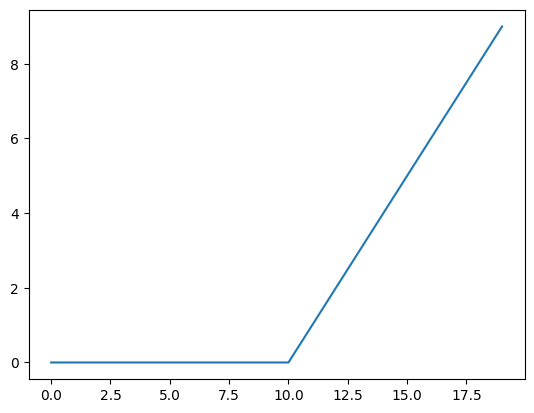

In [27]:
plt.plot(relu(A))

# 3.  Linear

In [28]:
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

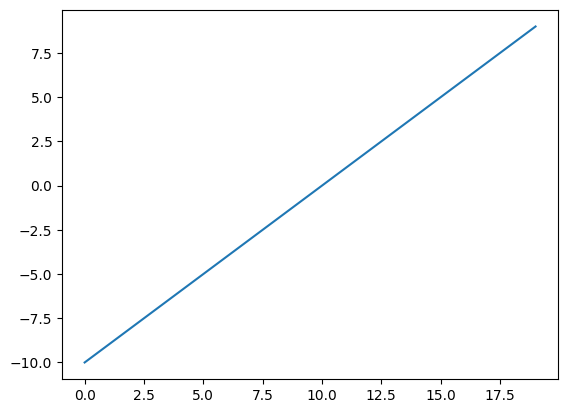

In [29]:
plt.plot(tf.keras.activations.linear(A))

In [30]:
A==tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

#CREATE TRAIN AND TEST SET

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((800, 2), (200, 2), (800,), (200,))

In [32]:
model7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model7.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=["accuracy"])

history=model7.fit(x_train,y_train,epochs=300,verbose=0)

In [33]:
model7.evaluate(x_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5093 - loss: 0.6930  


[0.6932153105735779, 0.5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


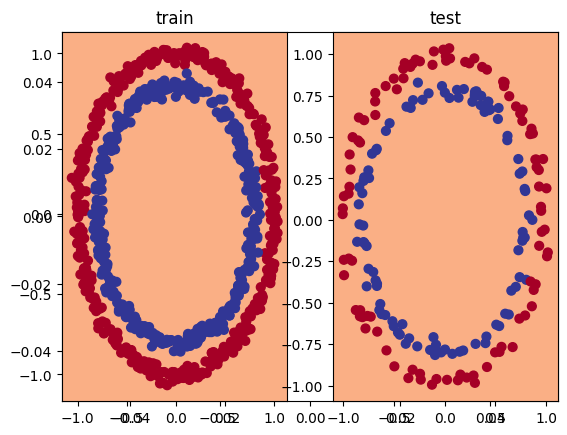

In [34]:
plt.plot(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model7,x=x_train,y=y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model7,x=x_test,y=y_test)

# Visualizing the history

Text(0.5, 1.0, 'Model 8 Loss Curves')

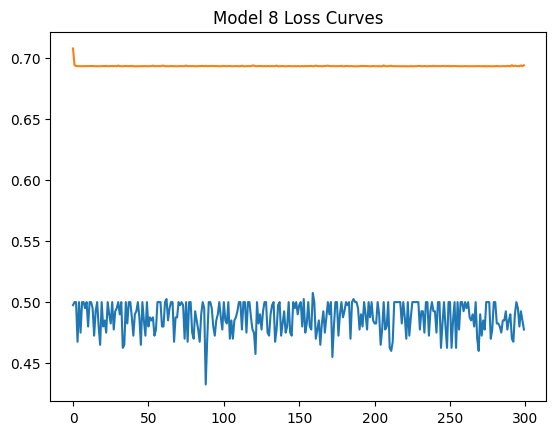

In [35]:
hist=pd.DataFrame(history.history)
plt.plot(hist)
plt.title("Model 8 Loss Curves")

# Ideal learning rate
To find the best learning rate  we will use

1. Learning rate callback
2. A modified loss curve

In [36]:
model8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# Creating learning rate scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch / 20))

# Fitting the model with the scheduler callback
history = model8.fit(x_train, y_train, epochs=300, verbose=0, callbacks=[lr_scheduler])


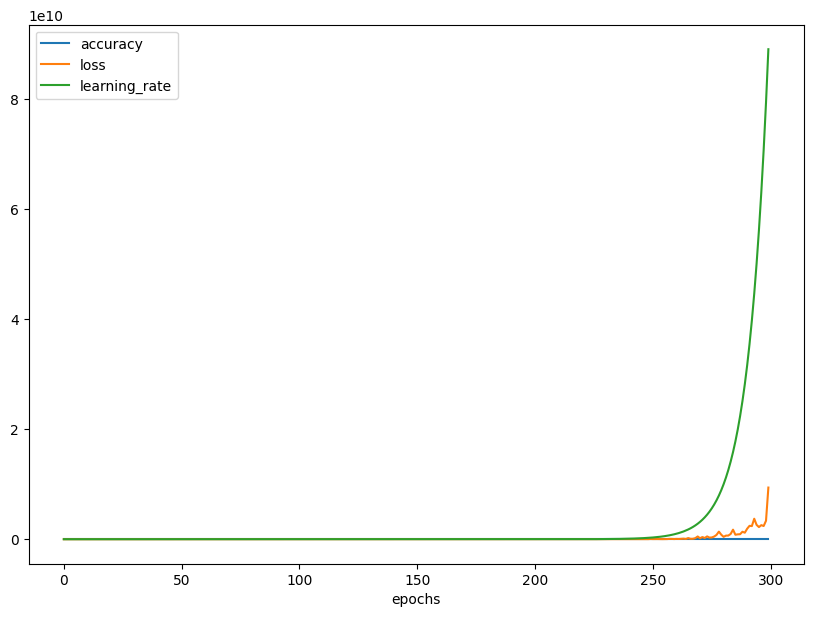

In [37]:
# history
pd.DataFrame(history.history).plot(figsize=(10,7),xlabel="epochs")
plt.show()

# plot the learning rate vs loss

In [38]:
lrs = 1e-4 * (10 ** (np.arange(300) / 20))
lrs

array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.46683592e-02, 5.01187234e-02, 5.62341325e-02,
      

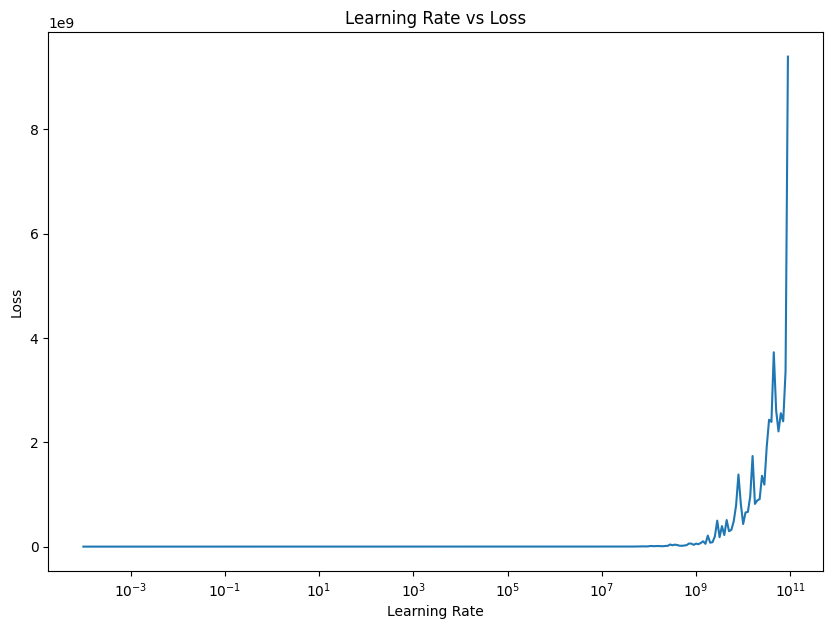

In [39]:
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"])  # Use semilogx for a log-scale x-axis
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")
plt.show()


In [40]:
model9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=["accuracy"])

history=model9.fit(x_train, y_train, epochs=300, verbose=0)

In [41]:
model9.evaluate(x_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9963 - loss: 0.0119  


[0.011095586232841015, 0.9950000047683716]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


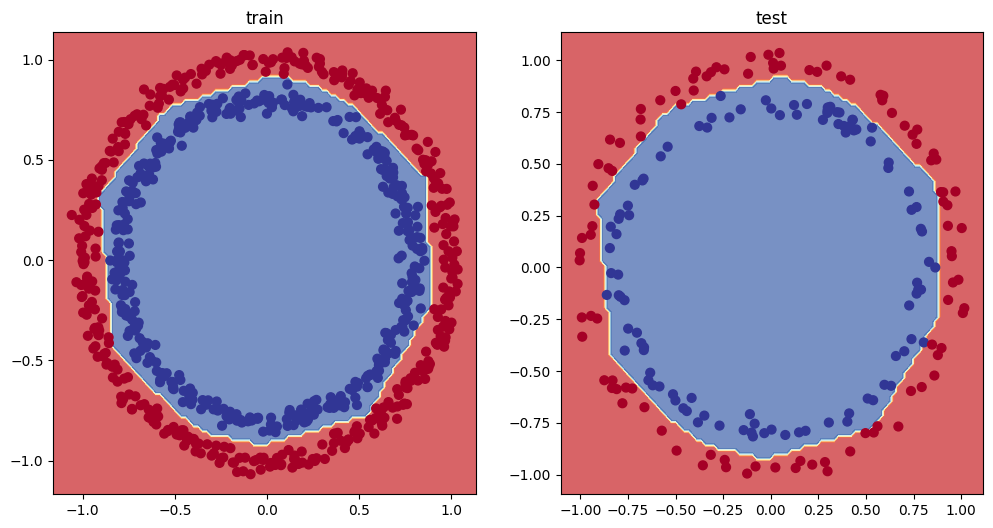

In [42]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model9,x=x_train,y=y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model9,x=x_test,y=y_test)
plt.show()

# Key Classification Metrics Explained


1. True Positive (TP): The model correctly predicts a positive case (e.g., detecting a bird when a bird is present).
2. True Negative (TN): The model correctly predicts a negative case (e.g., no bird detected when there is no bird).
3. False Positive (FP): The model incorrectly predicts a positive case (e.g., detecting a bird when there is no bird).
4. False Negative (FN): The model incorrectly predicts a negative case (e.g., failing to detect a bird when a bird is present).




# Evaluation Metrics for Classification Models

# Accuracy
* Measures the proportion of correct predictions out of all predictions.
* TensorFlow Function: `tf.keras.metrics.Accuracy()`
* Formula: \( \text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}} \)
* Use when the class distribution is balanced, and all classes are equally important.

# Precision
* Measures the proportion of true positives out of all predicted positives.
* TensorFlow Function: `tf.keras.metrics.Precision()`
* Formula: \( \text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}} \)
* Use when false positives are costly.

# Recall
* Measures the proportion of true positives out of all actual positives.
* TensorFlow Function: `tf.keras.metrics.Recall()`
* Formula: \( \text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}} \)
* Use when false negatives are costly.

# F1 Score
* Harmonic mean of precision and recall.
* TensorFlow Function: Custom implementation using `tf.keras.metrics.Mean()`.
* Formula: \( \text{F1 Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}} \)
* Use when there is class imbalance, or both false positives and false negatives are critical.

# Confusion Matrix
* Provides a detailed breakdown into TP, TN, FP, and FN.
* Formula:  
\[
\begin{matrix}
TP & FP \\
FN & TN
\end{matrix}
\]
* Scikit-learn Function: `sklearn.metrics.confusion_matrix()`
* Use to analyze and visualize classification performance.


# Confusion matrix
* A confusion matrix is a table used to evaluate the performance of a classification model.
* It provides a detailed breakdown of predictions into four categories:
  * True Positive (TP): Correctly predicted positive cases.
  * True Negative (TN): Correctly predicted negative cases.
  * False Positive (FP): Incorrectly predicted as positive when it's actually negative.
  * False Negative (FN): Incorrectly predicted as negative when it's actually positive.
* It helps in understanding the types of errors made by the model and is often used to calculate other performance metrics like accuracy, precision, recall, and F1 score.


In [45]:
y_preds=model9.predict(x_test)
y_preds[:5],y_test[:5]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


(array([[9.9998415e-01],
        [2.0510729e-03],
        [9.9999624e-01],
        [1.5958719e-08],
        [9.9983293e-01]], dtype=float32),
 array([1, 0, 1, 0, 1]))

# Convert predicted probablity to binary format
the above y_preds is in prediction probablity format which is the output of sigmoid or softmax so we need to change it to 1 and 0

In [48]:
y_preds_binary = tf.round(y_preds).numpy()
y_preds_binary[:5]

array([[1.],
       [0.],
       [1.],
       [0.],
       [1.]], dtype=float32)

In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_preds_binary)

array([[100,   0],
       [  1,  99]])

# Explanation:
* First row: [100, 0]
  * **True Positives (TP)** = 100: 100 birds correctly found.
  * **False Positives (FP)** = 0: No non-birds were wrongly called birds.
* Second row: [1, 99]
   * **False Negatives (FN)** = 1: 1 bird missed and called not a bird.
   * **True Negatives (TN)** = 99: 99 non-birds correctly called not birds.

#  SICKET LEARN PLOT CONFUSION MATRIX functon

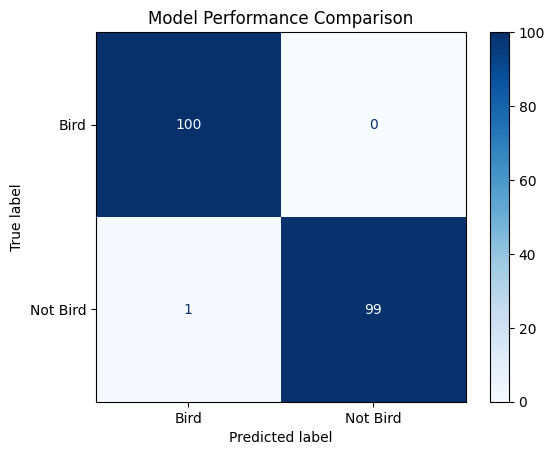

In [51]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_preds_binary)

# Create and plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Bird", "Not Bird"])

# Plot with a color map for better visual interpretation
disp.plot(cmap=plt.cm.Blues)
plt.title("Model Performance Comparison")
plt.show()


# Multiclass Classification
When more then two classes then it si multicalss classification ie 3 or more


In [53]:
from tensorflow.keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [55]:
print("Training sample: \n", train_data[0], "\n")
print("Test sample: \n", train_labels[0], "\n")


Training sample: 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1

In [59]:
# check shape
train_data[0].shape,train_labels[0].shape

((28, 28), ())

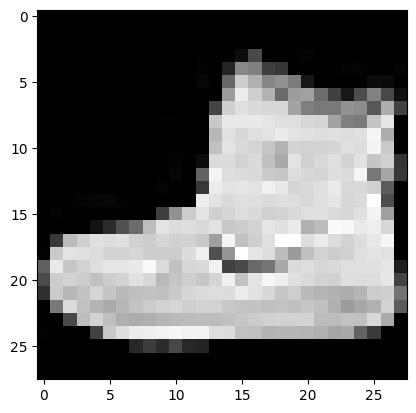

In [60]:
#plot one sample
plt.imshow(train_data[0],cmap="gray")

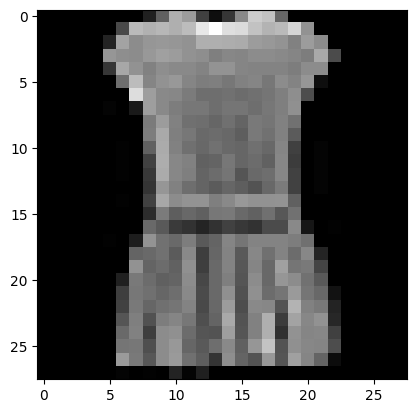

In [61]:
plt.imshow(train_data[3],cmap="gray")

In [64]:
# create a small list so we can index in same order
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]
len(class_names)

10

#ploting few images

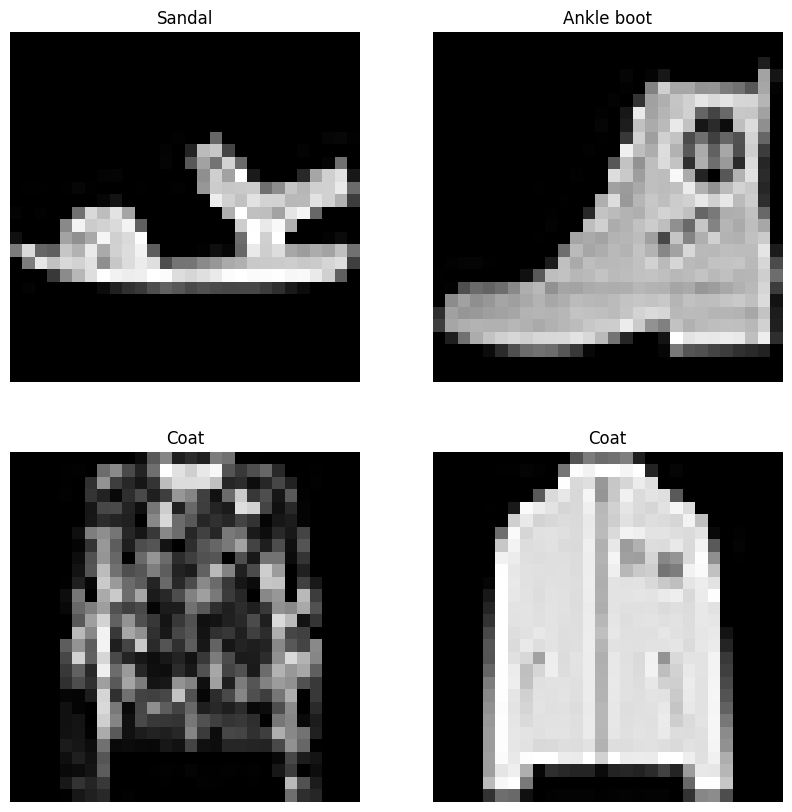

In [68]:
def plot_random_images(images, labels, class_names, num_images=4):
    random_indices = np.random.choice(len(images), num_images, replace=False)
    plt.figure(figsize=(10, 10))
    for i, idx in enumerate(random_indices):
        plt.subplot(2, 2, i+1)
        plt.imshow(images[idx], cmap='gray')
        plt.title(class_names[labels[idx]])
        plt.axis('off')
    plt.show()

plot_random_images(train_data, train_labels, class_names)

# Creating  A Classification model

In [70]:
train_data[0].shape,len(class_names)

((28, 28), 10)

# use sparese categorical crossentropy instead of categoricalcrossentropy



* because catgorical crosentropy needs labels in one hot enoded(terms of binary format)
* SparseCategoricalCrossentropy can accept integer labels (class indices) directly without one-hot encoding.

# Flatten
Flatten is used to convert a 2D image (e.g., 28x28) into a 1D vector (e.g., 784) so it can be processed by fully connected Dense layers.

# For shape error look for
1. Input shape
2. output shape
3. lossfunction

In [80]:
multiclassmodel1=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(30,activation="relu"),
    tf.keras.layers.Dense(30,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

multiclassmodel1.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)


multiclasshistory1 = multiclassmodel1.fit(train_data, train_labels, epochs=20, validation_data=(test_data, test_labels))



Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4341 - loss: 3.0544 - val_accuracy: 0.6041 - val_loss: 0.9864
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5994 - loss: 0.9887 - val_accuracy: 0.6281 - val_loss: 0.9109
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6213 - loss: 0.9030 - val_accuracy: 0.6080 - val_loss: 0.9468
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6301 - loss: 0.8814 - val_accuracy: 0.6188 - val_loss: 0.8928
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6324 - loss: 0.8670 - val_accuracy: 0.6436 - val_loss: 0.8372
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6398 - loss: 0.8351 - val_accuracy: 0.6374 - val_loss: 0.8441
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6411 - loss: 0.8403 - val_accuracy: 0.6364 - val_loss: 0.8911
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6431 - loss: 0.8381 - val_accurac

# Normalization

In [84]:
train_data.min(),train_data.max(),test_data.min(),test_data.max()

(0, 255, 0, 255)

# to get data between 0 and 1 we divide by max

In [90]:
train_data_norm=train_data/255.0
test_data_norm=test_data/255.0
train_data_norm.min(),train_data_norm.max(),test_data_norm.min(),test_data_norm.max()

(0.0, 6.030862941101084e-08, 0.0, 6.4e-05)

In [92]:
tf.random.set_seed(42)

# Steps in Modeling TensorFlow
## 1. DATA
* Turn all data into numbers (neural network can't handle strings)
* Make sure all tensors are in the right shape
* Scale features (Normalize or standardize) neural networks prefer normalization


In [100]:
multiclassmodel2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

multiclassmodel2.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)


multiclasshistory2 = multiclassmodel2.fit(train_data_norm, train_labels, epochs=20, validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1010 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0987 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0986 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - 

# ploting non normalized loss curves vs normalized losscurves

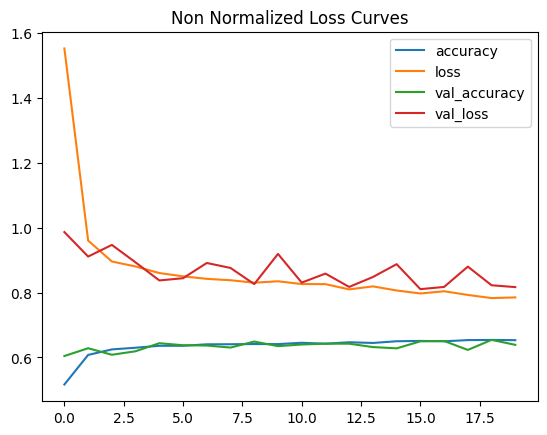

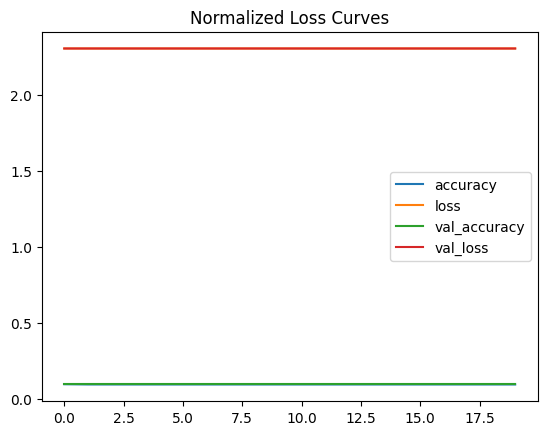

In [101]:
pd.DataFrame(multiclasshistory1.history).plot(title=("Non Normalized Loss Curves"))
pd.DataFrame(multiclasshistory2.history).plot(title=("Normalized Loss Curves"))
plt.show()

# Another model

In [103]:
Mmodel3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

Mmodel3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
        	    metrics=["accuracy"])

lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3*10**(epoch/40))


multiclasshistory3 = Mmodel3.fit(train_data_norm, train_labels, epochs=40, validation_data=(test_data_norm, test_labels),callbacks=[lr_scheduler])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1009 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026 - learning_rate: 0.0010
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.0987 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027 - learning_rate: 0.0011
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027 - learning_rate: 0.0011
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0988 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027 - learning_rate: 0.0012
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.0991 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027 - learning_rate: 0.0013
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0992 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027 - learning_rate: 0.0013
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0993 - l

# Ploting learning rate decay curve
### 1. The ideal learning rate is when loss is decreasing sharply
### 2. A little back from the lowest point on curve.

Text(0.5, 1.0, 'Finding ideal learning rate')

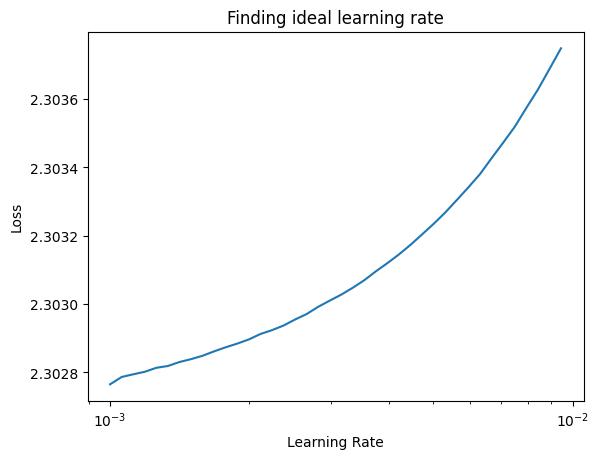

In [105]:
lrs=1e-3*(10**(np.arange(40)/40))
plt.semilogx(lrs,multiclasshistory3.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding ideal learning rate")


# refit on ideal learning rate

In [109]:
Mmodel4=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

Mmodel4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

multiclasshistory4 = Mmodel4.fit(train_data_norm, train_labels, epochs=40, validation_data=(test_data_norm, test_labels))

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1008 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0986 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.0986 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - 

# IMPROVED MODEL

In [110]:
MulticlassModel5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

MulticlassModel5.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
    metrics=["accuracy"]
)

multiclasshistory5 = MulticlassModel5.fit(
    train_data_norm, train_labels,
    epochs=20,
    validation_data=(test_data_norm, test_labels)
)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.1003 - loss: 2.3031 - val_accuracy: 0.1000 - val_loss: 2.3030
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.0990 - loss: 2.3030 - val_accuracy: 0.1000 - val_loss: 2.3030
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0990 - loss: 2.3030 - val_accuracy: 0.1000 - val_loss: 2.3030
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0990 - loss: 2.3030 - val_accuracy: 0.1000 - val_loss: 2.3030
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.0990 - loss: 2.3030 - val_accuracy: 0.1000 - val_loss: 2.3030
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.0990 - loss: 2.3030 - val_accuracy: 0.1000 - val_loss: 2.3030
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.0990 - loss: 2.3030 - val_accuracy: 0.1000 - val_loss: 2.3030
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.0990 - loss: 2.3030 

In [112]:
multiclassmodel6 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

multiclassmodel6.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

multiclasshistory6 = multiclassmodel6.fit(
    train_data_norm,
    train_labels,
    epochs=50,
    validation_data=(test_data_norm, test_labels)
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.1001 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0986 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.0985 - loss: 2.3028

In [119]:
# Get predictions from the model (choose the class with the highest probability)
y_preds = np.argmax(multiclassmodel6.predict(test_data_norm), axis=1)

# Calculate confusion matrix by comparing the true labels (test_labels) and predicted labels (y_preds)
conf_matrix = confusion_matrix(test_labels, y_preds)

y_preds[:10]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6])

In [120]:
conf_matrix

array([[   0,    0,    0,    0,    0,    0, 1000,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 1000,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 1000,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 1000,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 1000,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 1000,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 1000,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 1000,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 1000,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 1000,    0,    0,    0]])

In [121]:
# Create and compile the model
multiclassmodel6 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

multiclassmodel6.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

# Train the model
multiclasshistory6 = multiclassmodel6.fit(
    train_data_norm,
    train_labels,
    epochs=50,
    validation_data=(test_data_norm, test_labels)
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.0973 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.0984 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.0986 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.0985 - loss: 2.3028

***The issue was that the data was not properly normalized, with values staying between 0 and 255 instead of being scaled to a range between 0.0 and 1.0. Once the data was normalized, it was in the correct range for training the model.***

In [126]:
from tensorflow.keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

# Check the range of values before scaling
print("Train data - min:", train_data.min(), "max:", train_data.max())
print("Test data - min:", test_data.min(), "max:", test_data.max())

# Ensure data is in correct range (0 to 255) as integers
train_data = train_data.astype(np.uint8)
test_data = test_data.astype(np.uint8)

# Normalize the data by dividing by 255 (ensure the values are between 0 and 1)
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the range of values after normalization
print("Train data - min:", train_data_norm.min(), "max:", train_data_norm.max())
print("Test data - min:", test_data_norm.min(), "max:", test_data_norm.max())


Train data - min: 0 max: 255
Test data - min: 0 max: 255
Train data - min: 0.0 max: 1.0
Test data - min: 0.0 max: 1.0


In [127]:
multiclassmodel6 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

multiclassmodel6.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

multiclasshistory6 = multiclassmodel6.fit(
    train_data_norm,
    train_labels,
    epochs=50,
    validation_data=(test_data_norm, test_labels)
)


Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 4ms/step - accuracy: 0.7782 - loss: 0.6383 - val_accuracy: 0.8530 - val_loss: 0.4121
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8625 - loss: 0.3816 - val_accuracy: 0.8621 - val_loss: 0.3809
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8747 - loss: 0.3405 - val_accuracy: 0.8691 - val_loss: 0.3626
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8824 - loss: 0.3141 - val_accuracy: 0.8696 - val_loss: 0.3607
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8893 - loss: 0.2945 - val_accuracy: 0.8675 - val_loss: 0.3677
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8945 - loss: 0.2791 - val_accuracy: 0.8737 - val_loss: 0.3539
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8996 - loss: 0.2635 - val_accuracy: 0.8674 - val_loss: 0.3628
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9037 - loss: 0.252

In [129]:
# Get predictions from the model (choose the class with the highest probability)
y_preds = np.argmax(multiclassmodel6.predict(test_data_norm), axis=1)

# Calculate confusion matrix by comparing the true labels (test_labels) and predicted labels (y_preds)
conf_matrix = confusion_matrix(test_labels, y_preds)

conf_matrix


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[836,   7,  29,  29,   4,   1,  88,   0,   5,   1],
       [  2, 984,   0,   9,   2,   1,   2,   0,   0,   0],
       [ 20,   2, 893,  12,  30,   1,  42,   0,   0,   0],
       [ 29,  23,  12, 828,  23,   1,  81,   0,   3,   0],
       [  1,   2, 207,  42, 700,   1,  47,   0,   0,   0],
       [  0,   0,   0,   0,   0, 970,   1,  17,   0,  12],
       [160,   0, 155,  29,  62,   0, 587,   0,   7,   0],
       [  0,   0,   0,   0,   0,  18,   0, 965,   0,  17],
       [  8,   0,   6,   4,   3,   8,   9,   6, 955,   1],
       [  0,   0,   0,   0,   0,   9,   1,  63,   0, 927]])

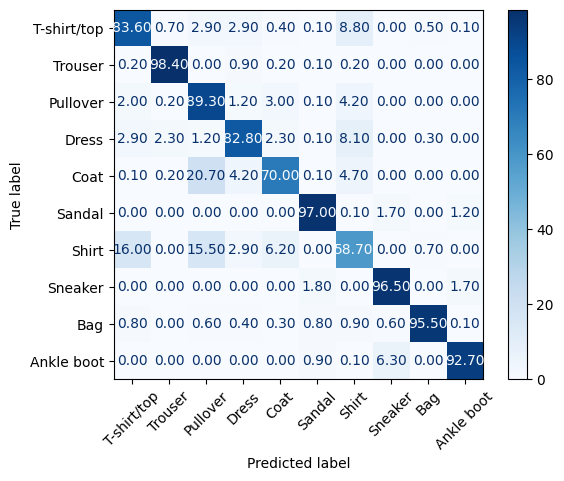

In [140]:
# Normalize the confusion matrix to show percentages
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Create a ConfusionMatrixDisplay object with the normalized confusion matrix and class names
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_percent, display_labels=class_names)

# Plot the confusion matrix with percentage values
disp.plot(cmap="Blues", values_format='.2f')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()



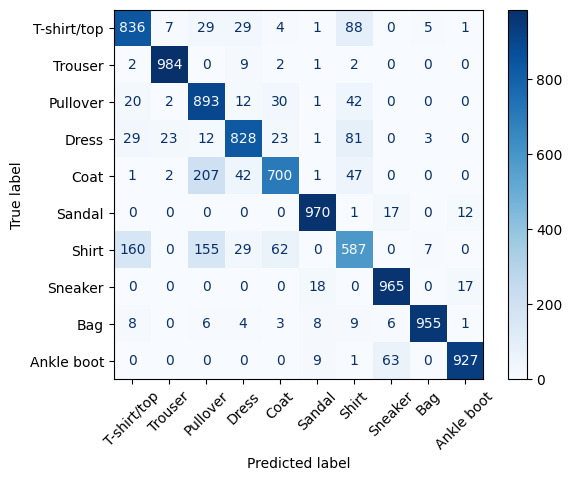

In [143]:
# Create a ConfusionMatrixDisplay object with the confusion matrix and class names
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)

# Plot the confusion matrix
disp.plot(cmap="Blues", values_format='d')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


### Create a function
1. plot the random image
2. make th prediction on said image
3. label the plot thetruth label and predictionlabel



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


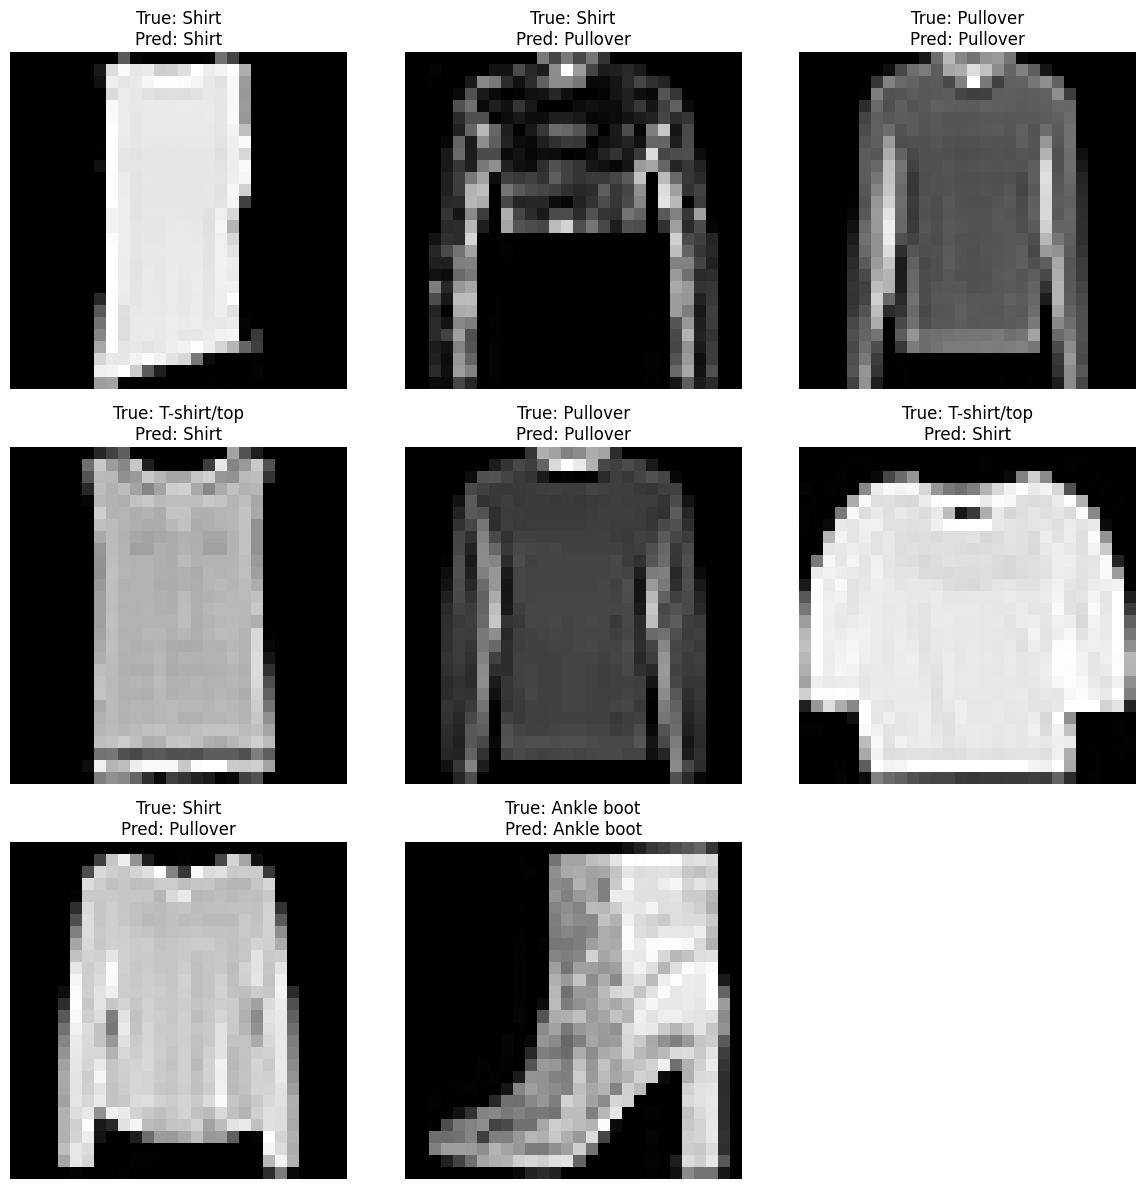

In [147]:
def plot_random_images_with_predictions(model, test_data, test_labels, class_names, num_images=8):
    # Pick random indices from the test set
    random_indices = np.random.randint(0, len(test_data), num_images)

    # Set up the plot with a grid of subplots
    plt.figure(figsize=(12, 12))

    for i, idx in enumerate(random_indices):
        # Get the image and true label
        image = test_data[idx]
        true_label = test_labels[idx]

        # Make a prediction on the image
        predicted_label = np.argmax(model.predict(np.expand_dims(image, axis=0)), axis=1)[0]

        # Create a subplot for each image
        plt.subplot(3, 3, i+1)
        plt.imshow(image, cmap="gray")
        plt.title(f"True: {class_names[true_label]}\nPred: {class_names[predicted_label]}")
        plt.axis('off')

    # Show the plot
    plt.tight_layout()
    plt.show()

# Call the function
plot_random_images_with_predictions(multiclassmodel6, test_data_norm, test_labels, class_names)


# Weights
* Control the influence of input features on the output.
* Updated during training to minimize the loss function.
* Essential for learning the relationship between inputs and outputs.

# Biases
* Added to the weighted sum of inputs to shift the activation function.
* Allow the model to fit better, even when inputs are zero.
* Independent of inputs, adjusted during training to improve flexibility.

# Summary
* Weights scale inputs, and biases shift the output, both are learned during training to optimize the model.


In [149]:
# patterns
weights,biases=multiclassmodel6.layers[1].get_weights()

# shapes
weights,weights.shape,biases.shape


(array([[-9.85913947e-02,  6.98655173e-02, -1.32043064e-02, ...,
          6.36053178e-03, -5.06319821e-01,  1.01815510e+00],
        [-2.27356419e-01,  2.79765576e-01, -3.78714688e-02, ...,
          4.48023707e-01, -6.51378274e-01, -1.41938937e+00],
        [-7.53283560e-01,  3.74339409e-02, -2.36729532e-03, ...,
         -2.55213070e+00,  4.34842706e-01, -9.73495185e-01],
        ...,
        [-2.28724569e-01,  6.56277360e-03,  2.93289199e-02, ...,
          7.65313148e-01, -5.39644122e-01, -6.89393282e-01],
        [ 1.99315459e-01,  8.29439998e-01, -1.25381835e-02, ...,
         -2.14696422e-01,  9.39805627e-01, -6.05428815e-01],
        [ 6.02807939e-01, -1.37126192e-01, -6.02842532e-02, ...,
          1.50670642e-02, -1.80028513e-01,  2.28586257e-01]], dtype=float32),
 (784, 128),
 (128,))

In [150]:
biases,biases.shape

(array([-0.2948822 , -0.16374889, -0.01589392,  0.23325096,  0.33535564,
        -0.01994818, -0.03077094,  0.45596418,  0.03018129, -0.44993314,
        -0.0414344 ,  0.82913905,  0.94821185, -0.02883275,  0.19408636,
         0.8311841 , -0.9988352 ,  0.57383156,  0.85158527, -0.43927082,
         0.7679626 ,  0.6311374 ,  0.63277614, -0.12889814,  0.80744797,
         0.03487648, -0.13440245,  0.06629662,  0.07965725,  0.49265182,
        -0.31871292,  0.08505561,  0.01851465,  0.86380863,  0.29733896,
         0.8904284 , -0.11294348,  0.29056898, -0.97430277, -0.5419026 ,
         1.3804094 ,  0.43407476,  0.7125972 , -0.01940579,  0.514337  ,
         0.60706043, -0.89359856, -0.08151796, -0.03447194,  0.80213183,
         0.42003018,  0.38092288,  0.12399065, -0.07283178,  0.72419924,
        -0.29322755, -0.23632324, -0.01157669,  1.1441926 , -0.07039345,
        -0.04937036, -0.2622135 ,  0.79760444,  0.24119684, -0.41448113,
        -0.31156278,  0.3081857 ,  1.0064676 ,  0.6

In [151]:
multiclassmodel6.summary()

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_20 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_99 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_100 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_101 (Dense)                    │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

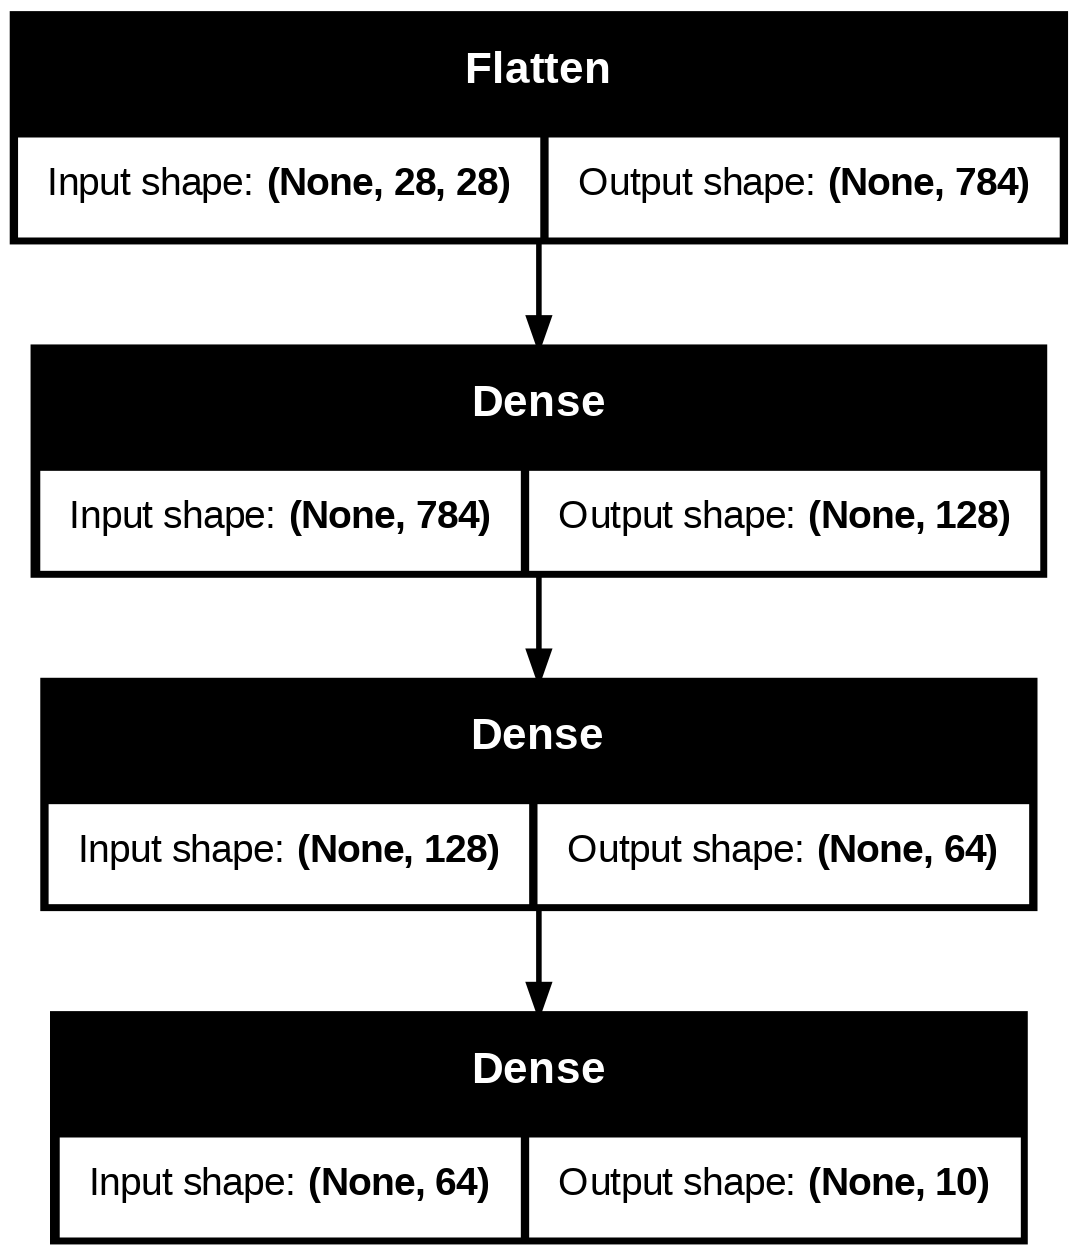

In [152]:
from tensorflow.keras.utils import plot_model
plot_model(multiclassmodel6,show_shapes=True)